[-1.         -0.995992   -0.99198395 -0.98797596 -0.98396796 -0.9799599
 -0.9759519  -0.9719439  -0.96793586 -0.96392787 -0.9599198  -0.9559118
 -0.9519038  -0.94789577 -0.94388777 -0.9398798  -0.9358717  -0.9318637
 -0.92785573 -0.9238477  -0.9198397  -0.9158317  -0.91182363 -0.90781564
 -0.90380764 -0.8997996  -0.8957916  -0.8917836  -0.88777554 -0.88376755
 -0.87975955 -0.8757515  -0.8717435  -0.8677355  -0.86372745 -0.85971946
 -0.8557114  -0.8517034  -0.8476954  -0.84368736 -0.83967936 -0.8356713
 -0.8316633  -0.8276553  -0.82364726 -0.81963927 -0.8156313  -0.8116232
 -0.8076152  -0.8036072  -0.7995992  -0.7955912  -0.7915832  -0.7875751
 -0.78356713 -0.77955914 -0.7755511  -0.7715431  -0.7675351  -0.76352704
 -0.75951904 -0.75551105 -0.751503   -0.747495   -0.743487   -0.73947895
 -0.73547095 -0.73146296 -0.7274549  -0.72344685 -0.7194389  -0.71543086
 -0.7114228  -0.70741487 -0.7034068  -0.69939876 -0.6953908  -0.69138277
 -0.6873747  -0.6833667  -0.6793587  -0.67535067 -0.67134

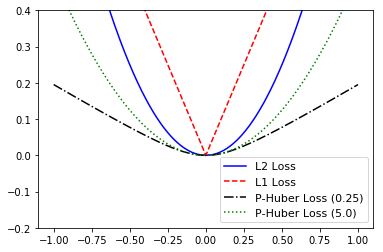

AttributeError: module 'tensorflow' has no attribute 'mul'

In [5]:
# Loss Functions
#----------------------------------
#
#  This python script illustrates the different
#  loss functions for regression and classification.

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

# Create graph
sess = tf.Session()

###### Numerical Predictions ######
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

# L2 loss
# L = (pred - actual)^2
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

# L1 loss
# L = abs(pred - actual)
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

# Pseudo-Huber loss
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

# Plot the output:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()


###### Categorical Predictions ######
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

# Hinge loss
# Use for predicting binary (-1, 1) classes
# L = max(0, 1 - (pred * actual))
hinge_y_vals = tf.maximum(0., 1. - tf.mul(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

# Cross entropy loss
# L = -actual * (log(pred)) - (1-actual)(log(1-pred))
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.mul((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

# Sigmoid entropy loss
# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
# or
# L = max(actual, 0) - actual * pred + log(1 + exp(-abs(actual)))
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(x_vals, targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

# Weighted (softmax) cross entropy loss
# L = -actual * (log(pred)) * weights - (1-actual)(log(1-pred))
# or
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

# Plot the output
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
#plt.xlim(-1, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

# Softmax entropy loss
# L = -actual * (log(softmax(pred))) - (1-actual)(log(1-softmax(pred)))
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(unscaled_logits, target_dist)
print(sess.run(softmax_xentropy))

# Sparse entropy loss
# Use when classes and targets have to be mutually exclusive
# L = sum( -actual * log(pred) )
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(unscaled_logits, sparse_target_dist)
print(sess.run(sparse_xentropy))